In [ ]:
"""
(15) Clusterização com DBSCAN

Use o algoritmo DBSCAN para agrupar dados de clientes de uma loja. Avalie o
desempenho da clusterização utilizando o coeficiente de Silhueta e faça uma análise
visual dos clusters.
__________________________________________________________________________________________

(15) Clustering with DBSCAN

Use the DBSCAN algorithm to group a store's customer data. Evaluate the
clustering performance using the Silhouette coefficient and perform an analysis
visual of the clusters.

"""

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors

In [2]:
mall_customers_data = pd.read_csv("mall-customers.csv", encoding="utf-8")

print(mall_customers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
# PRE-PROCESSING:
# Since the data in the 'Genre' column is object type, we have to convert to numeric.

label_encoder = LabelEncoder()
mall_customers_data['Genre'] = label_encoder.fit_transform(mall_customers_data['Genre'])

print(mall_customers_data.info())
print("\n")
print(mall_customers_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40


In [4]:
# Selecting the study features
x = mall_customers_data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# PRE-PROCESSING 2:
# DBSCAN is sensitive to the data's numerical scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
# Intializing DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Predicting
labels = dbscan.fit_predict(x_scaled)

In [12]:
# MEASURING MODEL SILHOUETTE COEFICIENT
if len(set(labels)) > 1 and -1 in labels:
    silhouette_avg = silhouette_score(x_scaled, labels)
    print(f"Silhouette Coefficient: {silhouette_avg}")
else:
    print("Cannot calculate silhouette score with less than 2 clusters.")

Silhouette Coefficient: -0.09860713108197441


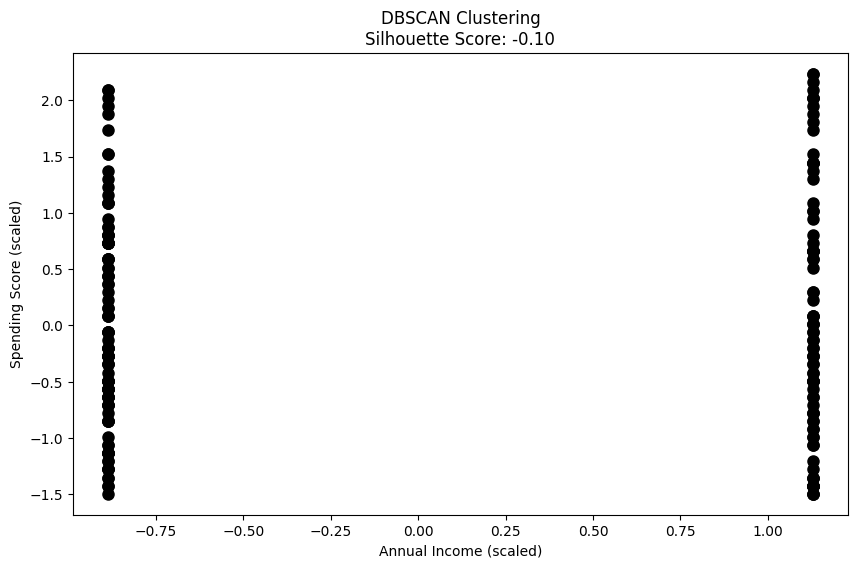

In [15]:
plt.figure(figsize=(10, 6))
unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title(f"DBSCAN Clustering\nSilhouette Score: {silhouette_avg:.2f}" if len(set(labels)) > 1 else "DBSCAN Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

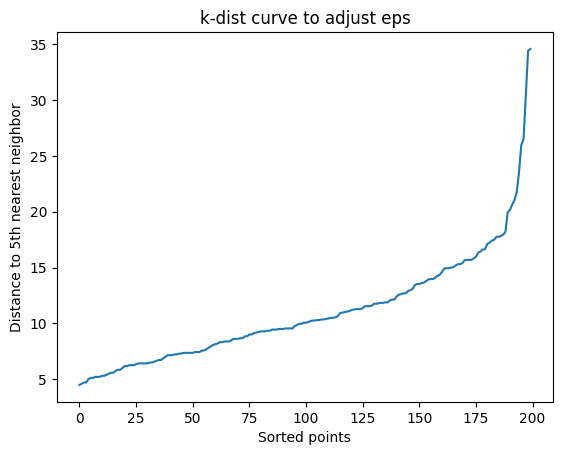

In [13]:
# TRYING TO IMPROVE SILHOUETTE COEFICIENT VALUE

# Studying values for the 'eps' parameter of the DBSCAN algorithm
nbrs = NearestNeighbors(n_neighbors=5).fit(x)
distances, indices = nbrs.kneighbors(x)

# Sorting distances for the plot
distances = np.sort(distances[:, 4], axis=0)

# Plot the k-nearest neighbor distances
plt.plot(distances)
plt.xlabel('Sorted points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('k-dist curve to adjust eps')
plt.show()

# The best value is the one where the curve is about to go up
# eps = Distance to 5th nearest neighbor

Number of clusters: 2
Noise points: 5
Silhouette Coefficient: 0.2569656789899596




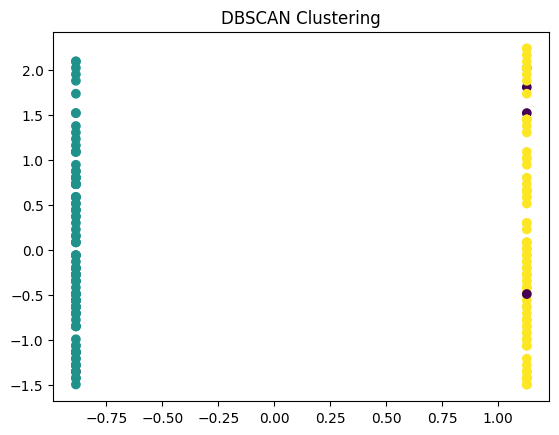

In [59]:
# Intializing DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=15)

# Predicting
labels = dbscan.fit_predict(x_scaled)

unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Noise points: {list(labels).count(-1)}")


if len(set(labels)) > 1 and -1 in labels:
    silhouette_2 = silhouette_score(x_scaled, labels)
    print(f"Silhouette Coefficient: {silhouette_2}")
else:
    print("Cannot calculate silhouette score with less than 2 clusters.")
print("\n")


plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.show()